In [1]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [2]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [3]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [4]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [5]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.4202452132652749, 0.7505572640141348],
 'diameter': 30.945815109750416,
 'confidence': 1.0,
 'timestamp': 99538.018239,
 'sphere': {'center': [5.385998498236966,
   -4.198034990379755,
   40.67798803374768],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [133.320161307486, 66.73054209520755],
  'axes': [172.74184491887888, 172.74184491887888],
  'angle': 0.0},
 'circle_3d': {'center': [-1.302979622920196,
   -5.398941616922533,
   32.81571132982747],
  'normal': [-0.6436472198089341, -0.11555729401767975, -0.7565479285752762],
  'radius': 1.5493754775612723},
 'diameter_3d': 3.0987509551225445,
 'ellipse': {'center': [80.68708094693278, 47.893005309286124],
  'axes': [23.48242739466334, 30.945815109750416],
  'angle': 17.551564921201745},
 'location': [80.68708094693278, 47.893005309286124],
 'model_confidence': 1.0,
 'theta': 1.6866123607950267,
 'phi': -2.2757364320330047}

Text(0.5, 0, 'Pupil timestamp (s)')

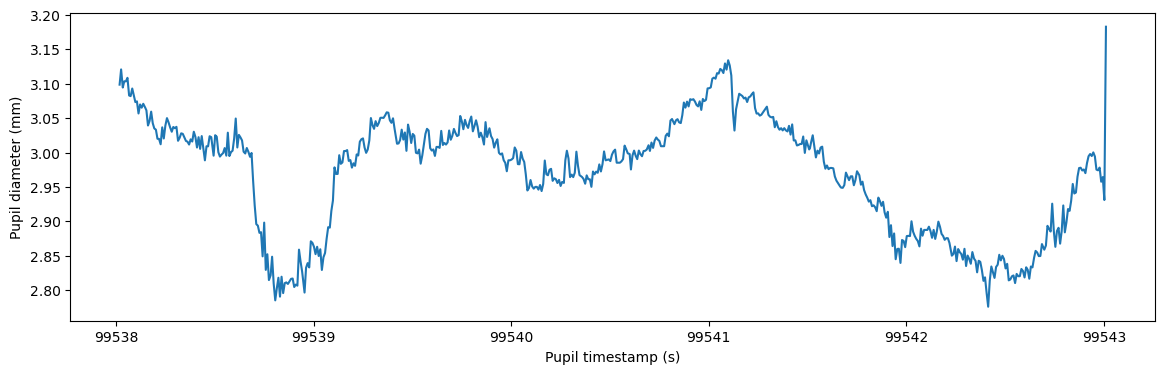

In [6]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')